In [1]:
# importing librarires
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

# importing FuncAnimation function for matplotlib source

from matplotlib.animation import FuncAnimation

In [2]:
# setting up parameter space

side_len = 100
end_time = 1000

c = 2 ** .5
grid_size = 1   # we take grid size equal in both spatial dimensions

step_size = (grid_size ** 2)/(4 * c ** 2)
gamma = ((c ** 2) * step_size) / (grid_size ** 2)

print(step_size)
print(gamma)

0.12499999999999997
0.25


In [3]:
# Initialize solution as u[k, i, j]
u = np.empty((end_time, side_len, side_len))

# initialising every interior point as 0
u_0 = 0

# Boundary conditions
u_uwall = 350.0
u_in = 500.0
u_lwall = 425.0
u_out = 250.0

# Set the initial condition
u.fill(u_0)

# Set the boundary conditions
u[:, (side_len-1), :] = u_uwall
u[:, :, :1] = u_in
u[:, :1, 1:] = u_lwall
u[:, :, (side_len-1):] = u_out



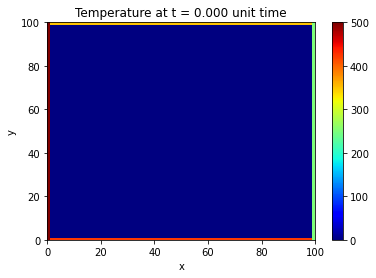

In [5]:
def calculate(u):
    for k in range(0, end_time-1, 1):
        for i in range(1, side_len-1, grid_size):
            for j in range(1, side_len-1, grid_size):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

def heatmap(u_k, k):
    plt.clf()

    plt.title(f"Temperature at t = {k*step_size:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=500)
    plt.colorbar()

    return plt

# calculation step
u = calculate(u)

def animate(k):
    heatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=step_size, frames=end_time, repeat=False)


my_writer=animation.PillowWriter(fps=20, codec='libx264', bitrate=500)

anim.save(filename='gif_test.gif', writer=my_writer)
plt.show()
# anim.save("heat_equation_solution.mp4")

In [6]:
# importing librarires
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

# importing FuncAnimation function for matplotlib source

from matplotlib.animation import FuncAnimation

In [7]:
# setting up parameter space

side_len = 100
end_time = 1000

c = 2 ** .5
grid_size = 1   # we take grid size equal in both spatial dimensions

step_size = (grid_size ** 2)/(4 * c ** 2)
gamma = ((c ** 2) * step_size) / (grid_size ** 2)

print(step_size)
print(gamma)

0.12499999999999997
0.25


In [8]:
# Initialize solution as u[k, i, j]
u = np.empty((end_time, side_len, side_len))

# initialising every interior point as 0
u_0 = 0

# Boundary conditions
u_out = 500.0
u_in = 250.0

# Set the initial condition
u.fill(u_0)

# Set the boundary conditions
u[:, (side_len-1), :] = u[:, (side_len-2), :]
u[:, :, :1] = u_out
u[:, 0, 1:] = u[:, 1, 1:]
u[:, :, (side_len-1):] = u_in

In [ ]:
def calculate(u):
    for k in range(0, end_time-1, 1):
        for i in range(0, side_len-1, grid_size):
            for j in range(0, side_len-1, grid_size):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

def heatmap(u_k, k):
    plt.clf()

    plt.title(f"Temperature at t = {k*step_size:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=500)
    plt.colorbar()

    return plt

# calculation step
u = calculate(u)

print(u[28, 0, 7])

def animate(k):
    heatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=end_time, repeat=False)


my_writer=animation.PillowWriter(fps=20, codec='libx264', bitrate=500)

anim.save(filename='gif_test1.gif', writer=my_writer)
plt.show()
# anim.save("heat_equation_solution2.mp4")

3.9206652019701247
